In [14]:
import dolfin as df
import numpy as np

In [19]:
mesh = df.UnitSquareMesh(100, 100)
V = df.FunctionSpace(mesh, 'Lagrange', 1)

Calling FFC just-in-time (JIT) compiler, this may take some time.


In [20]:
# for ipython notebook
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.tri as tri

def mesh2triang(mesh):
    xy = mesh.coordinates()
    return tri.Triangulation(xy[:, 0], xy[:, 1], mesh.cells())

def plot(obj):
    plt.gca().set_aspect('equal')
    if isinstance(obj, dolfin.Function):
        mesh = obj.function_space().mesh()
        if (mesh.geometry().dim() != 2):
            raise(AttributeError)
        if obj.vector().size() == mesh.num_cells():
            C = obj.vector().array()
            plt.tripcolor(mesh2triang(mesh), C)
        else:
            C = obj.compute_vertex_values(mesh)
            plt.tripcolor(mesh2triang(mesh), C, shading='gouraud')
    elif isinstance(obj, dolfin.Mesh):
        if (obj.geometry().dim() != 2):
            raise(AttributeError)
        plt.triplot(mesh2triang(obj), color='k')


In [26]:
v = df.TestFunction(V)
u = df.TrialFunction(V)
a = -df.inner(df.nabla_grad(u), df.nabla_grad(v))*df.dx
rhs = df.Expression('sin(2*pi*x[0])*sin(2*pi*x[1])')
F = df.inner(rhs, v)*df.dx
def on_bdy(x, on_bdy):
    return on_bdy
bcs = df.DirichletBC(V, df.Constant(0), on_bdy)

u_sol = df.Function(V)
df.solve(a == F, u_sol, bcs)

Calling FFC just-in-time (JIT) compiler, this may take some time.


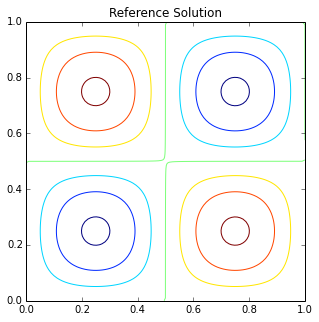

In [31]:
plot_x, plot_y = np.mgrid[0:1:100j, 0:1:100j]
z = np.vectorize(u_sol)(plot_x.ravel(), plot_y.ravel())
plt.figure(figsize=(5,5))
plt.contour(plot_x, plot_y, z.reshape(plot_x.shape))
plt.title('Reference Solution')
plt.savefig('ref_solution.pdf', transparent=True, bbox_inches='tight')